# MLP Classification

### 1. Activation function
- sigmoid
  $$ f(x) = \frac{1}{1+e^{-x}} $$
- softmax 
  - 각 벡터의 요소 $ s_i $를 (0, 1) 범위 안에 있도록 해줌.
  - 모든 합이 1
  $$ s_i = f( {e_i} ) = \frac{e^i}{\sum_{j=0}^{C}{e^j}} $$
  
### 2. Cross-Entropy Loss (loss function)
- Binary classification 문제
  - 마지막 output에 따라 주어진 input feature X가 A, B 중 어떤 클래스인지 판정하는 문제
  - 고양이=0, 개=1. sigmoid activation 사용
  - Cross Entropy
  $$ CE = - \sum_{i=0}^{C} {{t_i}{log({s_i})}}  $$
  - Binary Classification에서 C=1
      - $ CE = -t_0 log({s_0}) - t_1 log({s_1}) $
      - EX1) 고양이 사진을 주었는데 $s_0 = 0.2$가 나온 경우
          - $[t_0 , t_1 ] = [0, 1] 이므로 t_0 = 0 $
          - $ CE = -[0 \times log(0.2)] - [1 \times log(0.8)] = 0.223 $
          - 즉 CE loss = 0.223이므로 0에 가깝다. model을 잘 판단한 경우
      - EX2) 고양이 사진을 주었는데 $s_0 = 0.7$가 나온 경우
          - $[t_0 , t_1 ] = [0, 1] 이므로 t_0 = 0 $
          - $ CE = -[0 \times log(0.7)] - [1 \times log(0.3)] = 1.203 $
          - 즉 CE loss = 1.203이므로 1에 가깝다. model을 잘 판정하지 못한 경우
      - EX3) 개 사진을 주었는데 $s_0 = 0.9$가 나온 경우
          - $[t_0 , t_1 ] = [0, 1] 이므로 t_0 = 1 $
          - $ CE = -[0 \times log(0.9)] - [1 \times log(0.1)] = 0.105 $
          - 즉 CE loss가 0에 가깝다. model을 잘 판정한 경우
- 따라서 CE loss function으로 learning을 하는 경우 model은 ground truth의 classification을 따라 제대로 classify 하려는 방향으로 parameter들을 optimize하게 됨.
- Softmax Activation 뒤에는 Cross-Entropy Loss를 붙임. -> 3개 이상의 Classification에서 많이 사용

## Breast Cancer Dataset
- 569개의 data instance
- y Class: 양성 357(not cancer), 악성 212(cancer)
- X 30개의 feature

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
whole_data = load_breast_cancer()

In [3]:
X_data = whole_data.data
y_data = whole_data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=7)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(398, 30) (398,) (171, 30) (171,)


In [63]:
model = Sequential()

In [64]:
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                

In [65]:
adam = optimizers.Adam(lr = 0.01)

In [66]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6768 - accuracy: 0.5912 - val_loss: 0.6495 - val_accuracy: 0.6625
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.5912 - val_loss: 0.6501 - val_accuracy: 0.6625
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.5912 - val_loss: 0.6506 - val_accuracy: 0.6625
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.5912 - val_loss: 0.6493 - val_accuracy: 0.6625
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5912 - val_loss: 0.6502 - val_accuracy: 0.6625
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.5912 - val_loss: 0.6504 - val_accuracy: 0.6625
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.5912 - val_loss: 0.6498 - val_accuracy: 0.6625
Epoch 8/100
7/7 [==========

In [72]:
import matplotlib.pyplot as plt

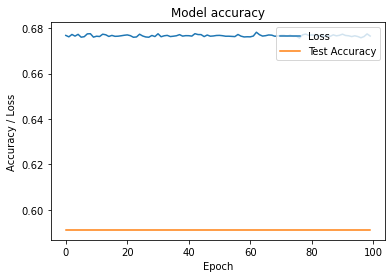

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Test Accuracy'], loc='upper right')
plt.show()

In [74]:
results = model.evaluate(X_test, y_test)
print('loss:', results[0])
print('accuracy:', results[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6784
loss: 0.6421257257461548
accuracy: 0.6783625483512878
